In [3]:
from keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

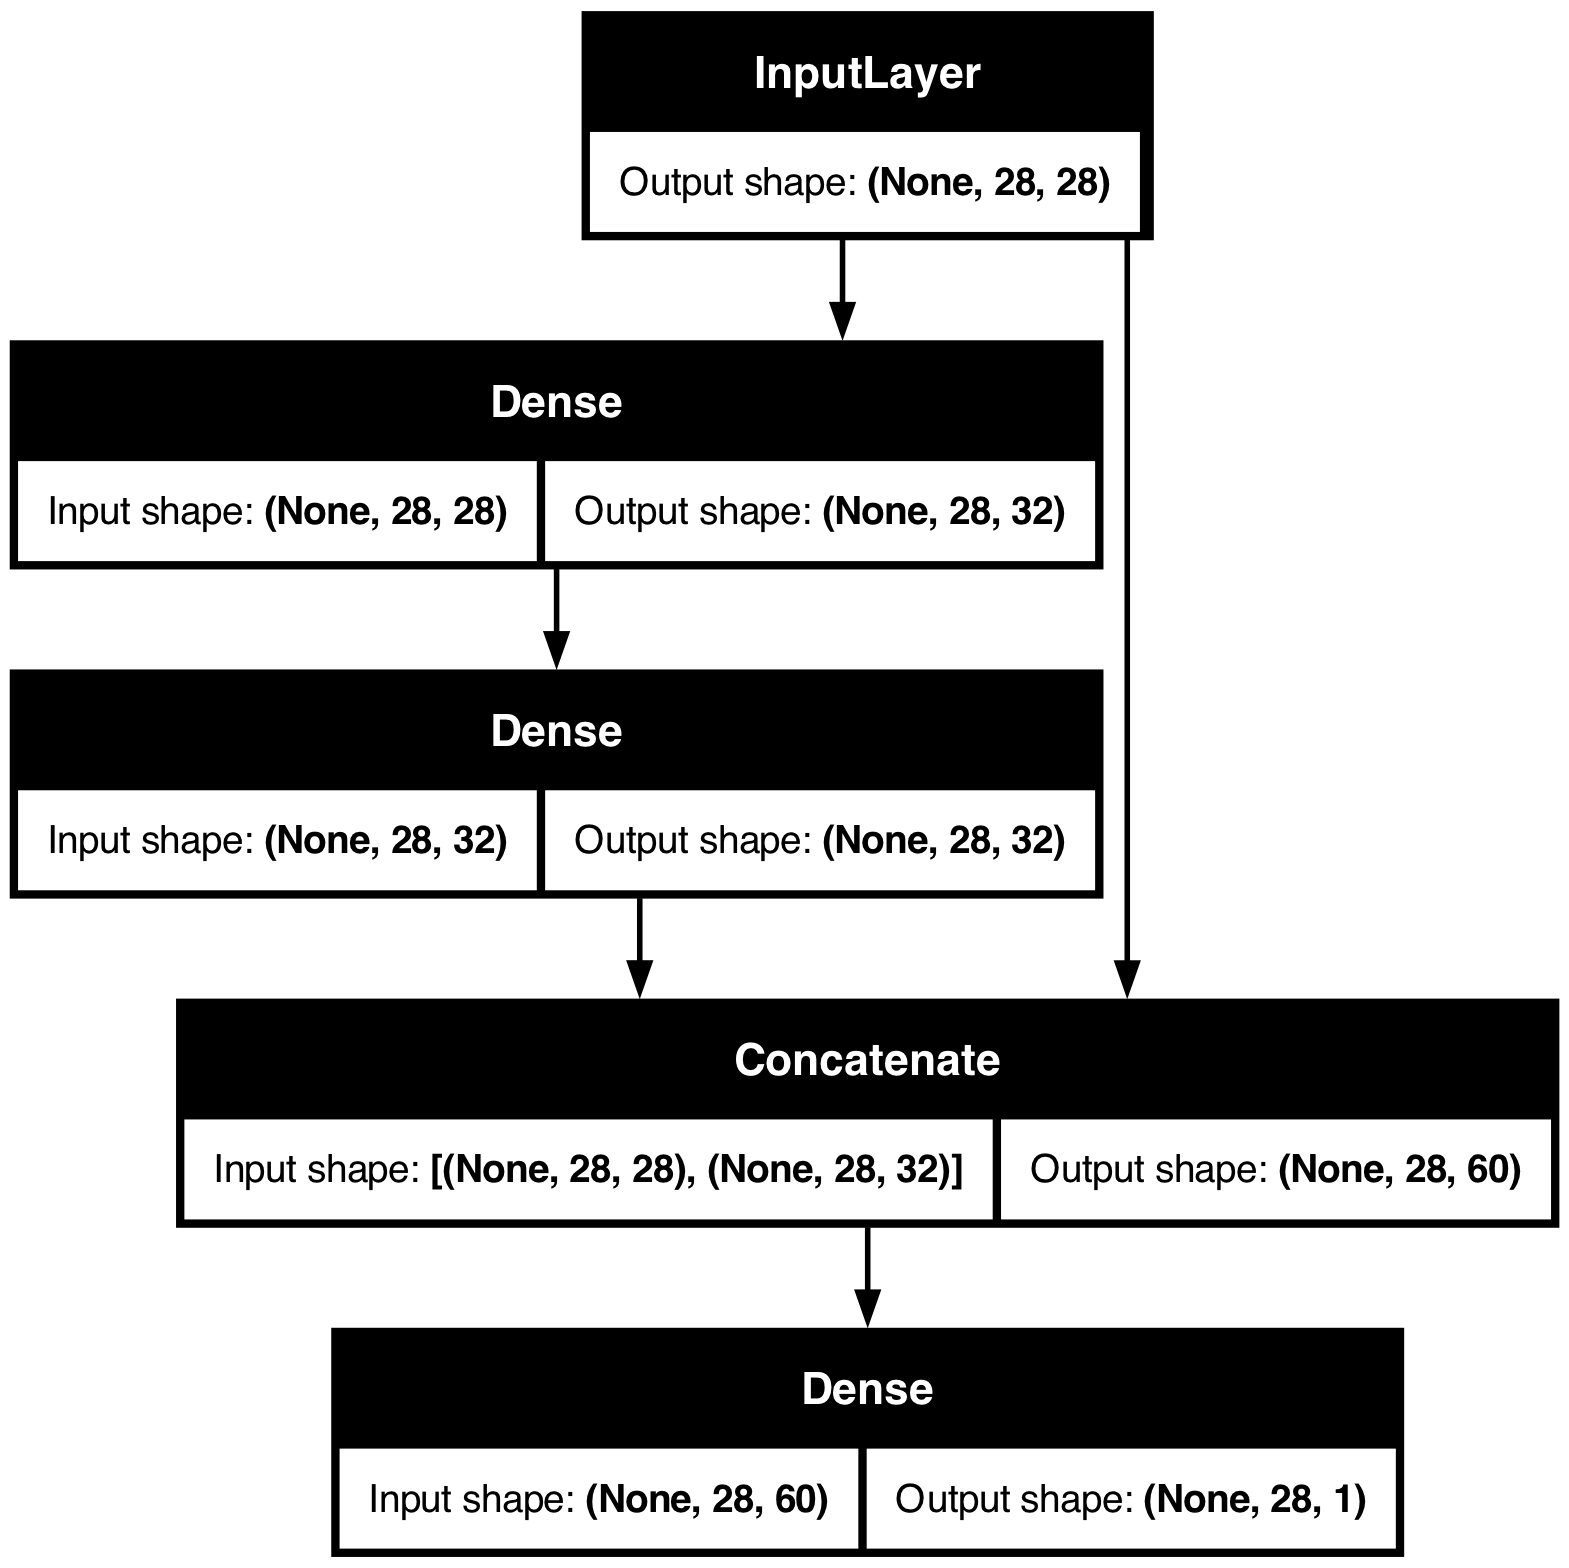

In [7]:
from keras import layers
from keras import models
from keras import utils

model = None

way = 1
if way == 0:
    input = layers.Input(shape=(28, 28))
    hidden1 = layers.Dense(32, activation="relu")(input)
    hidden2 = layers.Dense(32, activation="relu")(hidden1)

    concat = layers.concatenate([input, hidden2])
    output = layers.Dense(1)(concat)

    model = models.Model(inputs=[input], outputs=[output])
else:
    input = layers.Input(shape=(28, 28))
    hidden1 = layers.Dense(32, activation="relu")
    hidden2 = layers.Dense(32, activation="relu")

    concat = layers.concatenate([input, hidden2(hidden1(input))])
    output = layers.Dense(1)

    model = models.Model(inputs=[input], outputs=[output(concat)])
    
utils.plot_model(model=model, show_shapes=True)